In [35]:
'''
Here are some preliminary imports. We'll need more.
Feel free to install and import any packages you'd like.
'''
%env SHELL=/.zshrc
import requests
import os
import json
import numpy as np
import pandas as pd
import pyarrow
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score
from matplotlib import rcParams
import random
from sklearn import svm, datasets
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
from keras.preprocessing.sequence import pad_sequences
import keras.models
from keras.models import Sequential
from keras.layers import Dense

env: SHELL=/.zshrc


In [2]:
'''
Let's retrieve all issues in the Apache Airflow OSS project using the github api. 
Insert your username below (in two places).

You should end up with about 20k issues, including ones that date back to 2015 when the project was created.
'''
def get_issues_from_api():
    session = requests.Session()
    url = "https://api.github.com/repos/apache/airflow/issues?state=all"
    response = session.get(
        url,
        auth=(
            "pattybolan", # your github username
            os.environ.get("GITHUB_AUTH_TOKEN")
        ),
    )
    yield response.json()

    page=2
    while 'next' in response.links:
        response = session.get(
            url,
            auth=(
                "pattybolan", # your github username
                os.environ.get("GITHUB_AUTH_TOKEN")
            ),
            params={"page": page}
        )
        page += 1
        yield response.json()
        

def get_all_issues(cache_path="airflow_issues.feather"):
    #if os.path.exists(cache_path):
    #    print("retrieving issues from cache")
    #    df = pd.read_feather(cache_path)
    #else:
    print("retrieving issues from API")
    df_shards = []
    for i, page in enumerate(get_issues_from_api()):
        print(f"retrieving page {i}")
        if not page:
            print(f"No issues found on page {i}: {page}")
            continue
        page_df = pd.DataFrame(page)
        df_shards.append(page_df)
    df = pd.concat(df_shards).reset_index()
    print(f"Saving results to {cache_path}")
    df.to_feather(cache_path)
    return df

In [3]:
df = get_all_issues()

retrieving issues from API
retrieving page 0
retrieving page 1
retrieving page 2
retrieving page 3
retrieving page 4
retrieving page 5
retrieving page 6
retrieving page 7
retrieving page 8
retrieving page 9
retrieving page 10
retrieving page 11
retrieving page 12
retrieving page 13
retrieving page 14
retrieving page 15
retrieving page 16
retrieving page 17
retrieving page 18
retrieving page 19
retrieving page 20
retrieving page 21
retrieving page 22
retrieving page 23
retrieving page 24
retrieving page 25
retrieving page 26
retrieving page 27
retrieving page 28
retrieving page 29
retrieving page 30
retrieving page 31
retrieving page 32
retrieving page 33
retrieving page 34
retrieving page 35
retrieving page 36
retrieving page 37
retrieving page 38
retrieving page 39
retrieving page 40
retrieving page 41
retrieving page 42
retrieving page 43
retrieving page 44
retrieving page 45
retrieving page 46
retrieving page 47
retrieving page 48
retrieving page 49
retrieving page 50
retrieving pag

retrieving page 414
retrieving page 415
retrieving page 416
retrieving page 417
retrieving page 418
retrieving page 419
retrieving page 420
retrieving page 421
retrieving page 422
retrieving page 423
retrieving page 424
retrieving page 425
retrieving page 426
retrieving page 427
retrieving page 428
retrieving page 429
retrieving page 430
retrieving page 431
retrieving page 432
retrieving page 433
retrieving page 434
retrieving page 435
retrieving page 436
retrieving page 437
retrieving page 438
retrieving page 439
retrieving page 440
retrieving page 441
retrieving page 442
retrieving page 443
retrieving page 444
retrieving page 445
retrieving page 446
retrieving page 447
retrieving page 448
retrieving page 449
retrieving page 450
retrieving page 451
retrieving page 452
retrieving page 453
retrieving page 454
retrieving page 455
retrieving page 456
retrieving page 457
retrieving page 458
retrieving page 459
retrieving page 460
retrieving page 461
retrieving page 462
retrieving page 463


In [4]:
df

,index,url,repository_url,labels_url,comments_url,events_url,html_url,id,node_id,number,...,closed_at,author_association,active_lock_reason,draft,pull_request,body,reactions,timeline_url,performed_via_github_app,state_reason
0,0,https://api.github.com/repos/apache/airflow/is...,https://api.github.com/repos/apache/airflow,https://api.github.com/repos/apache/airflow/is...,https://api.github.com/repos/apache/airflow/is...,https://api.github.com/repos/apache/airflow/is...,https://github.com/apache/airflow/pull/23872,1245371861,PR_kwDOAgUK2844Tc8k,23872,...,None,CONTRIBUTOR,None,False,{'url': 'https://api.github.com/repos/apache/a...,Not sure if additional tests required because ...,{'url': 'https://api.github.com/repos/apache/a...,https://api.github.com/repos/apache/airflow/is...,None,None
1,1,https://api.github.com/repos/apache/airflow/is...,https://api.github.com/repos/apache/airflow,https://api.github.com/repos/apache/airflow/is...,https://api.github.com/repos/apache/airflow/is...,https://api.github.com/repos/apache/airflow/is...,https://github.com/apache/airflow/issues/23871,1245330658,I_kwDOAgUK285KOjzi,23871,...,None,CONTRIBUTOR,None,NaN,NaN,### Apache Airflow version\n\n2.3.0 (latest re...,{'url': 'https://api.github.com/repos/apache/a...,https://api.github.com/repos/apache/airflow/is...,None,None
2,2,https://api.github.com/repos/apache/airflow/is...,https://api.github.com/repos/apache/airflow,https://api.github.com/repos/apache/airflow/is...,https://api.github.com/repos/apache/airflow/is...,https://api.github.com/repos/apache/airflow/is...,https://github.com/apache/airflow/pull/23870,1245278341,PR_kwDOAgUK2844TIcn,23870,...,None,NONE,None,False,{'url': 'https://api.github.com/repos/apache/a...,"When this parameter is set, the dag_id string ...",{'url': 'https://api.github.com/repos/apache/a...,https://api.github.com/repos/apache/airflow/is...,None,None
3,3,https://api.github.com/repos/apache/airflow/is...,https://api.github.com/repos/apache/airflow,https://api.github.com/repos/apache/airflow/is...,https://api.github.com/repos/apache/airflow/is...,https://api.github.com/repos/apache/airflow/is...,https://github.com/apache/airflow/issues/23868,1245233297,I_kwDOAgUK285KOMCR,23868,...,None,MEMBER,None,NaN,NaN,"### Body\n\nCurrently, if any tests fail when ...",{'url': 'https://api.github.com/repos/apache/a...,https://api.github.com/repos/apache/airflow/is...,None,None
4,4,https://api.github.com/repos/apache/airflow/is...,https://api.github.com/repos/apache/airflow,https://api.github.com/repos/apache/airflow/is...,https://api.github.com/repos/apache/airflow/is...,https://api.github.com/repos/apache/airflow/is...,https://github.com/apache/airflow/issues/23867,1245194142,I_kwDOAgUK285KOCee,23867,...,None,MEMBER,None,NaN,NaN,"### Body\n\nCurrently, running the (new) `bree...",{'url': 'https://api.github.com/repos/apache/a...,https://api.github.com/repos/apache/airflow/is...,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22229,29,https://api.github.com/repos/apache/airflow/is...,https://api.github.com/repos/apache/airflow,https://api.github.com/repos/apache/airflow/is...,https://api.github.com/repos/apache/airflow/is...,https://api.github.com/repos/apache/airflow/is...,https://github.com/apache/airflow/pull/5,85591771,MDExOlB1bGxSZXF1ZXN0MzcwNTQyMzc=,5,...,2015-06-07T07:55:22Z,CONTRIBUTOR,None,False,{'url': 'https://api.github.com/repos/apache/a...,I was reading over the code to understand how ...,{'url': 'https://api.github.com/repos/apache/a...,https://api.github.com/repos/apache/airflow/is...,None,None
22230,0,https://api.github.com/repos/apache/airflow/is...,https://api.github.com/repos/apache/airflow,https://api.github.com/repos/apache/airflow/is...,https://api.github.com/repos/apache/airflow/is...,https://api.github.com/repos/apache/airflow/is...,https://github.com/apache/airflow/issues/4,85557204,MDU6SXNzdWU4NTU1NzIwNA==,4,...,2015-06-05T17:24:57Z,CONTRIBUTOR,None,NaN,NaN,Wh

# Preprocessing

In [5]:
'''
There are lots of fields in the data. 
We will preprocess the data, engineer some features, and keep only the promising features.
'''
df.columns

Index(['index', 'url', 'repository_url', 'labels_url', 'comments_url',
       'events_url', 'html_url', 'id', 'node_id', 'number', 'title', 'user',
       'labels', 'state', 'locked', 'assignee', 'assignees', 'milestone',
       'comments', 'created_at', 'updated_at', 'closed_at',
       'author_association', 'active_lock_reason', 'draft', 'pull_request',
       'body', 'reactions', 'timeline_url', 'performed_via_github_app',
       'state_reason'],
      dtype='object')

In [6]:
df = df.drop(columns=['index', 'url', 'repository_url', 'labels_url', 'comments_url',
                      'events_url', 'html_url', 'performed_via_github_app', 'locked',
                      'active_lock_reason', 'assignees', 'milestone'])

# Processing timestamps
df['created_at'] = pd.to_datetime(df['created_at'], format="%Y/%m/%d")
df['closed_at'] = pd.to_datetime(df['closed_at'], format="%Y/%m/%d")

# Binarizing some features
df["has_pull_request"] = df.pull_request.apply(lambda x: True if x is not None else False)
df["has_comment"] = df.comments.apply(lambda x: True if x > 0 else False)
df['has_assignee'] = df['assignee'].apply(lambda x: True if x is not None else False)

# Extracting the lengths of text features `title` and `body`
df = df[df.body.notnull()]
df['length_of_title'] = df['title'].apply(lambda x: len(x))
df['length_of_body'] = df['body'].apply(lambda x: len(x))

# Removing issues created by bots
df['creator_user_login'] = df['user'].apply(lambda x: x.get('login'))
df = df[df['creator_user_login'] != 'dependabot[bot]']

In [7]:
# Parsing the `labels` to determine the number of labels and which of the popular labels are used for each issue
df['label_names'] = df['labels'].apply(lambda x: [str(i.get('name')) for i in x])
df['n_labels'] = df['label_names'].apply(lambda x: len(x))
not_labels = df.columns.to_list()

def label_column_to_true(row):
    for label in row.label_names:
        label = (
            label     
            .replace(":", "_")
            .replace(" ", "_")
            .replace("/", "_")
            .replace("'", "")
            .replace(".", "_")
            .replace("-", "_")
        )
        row[label] = 1
    return row


df_labels = df.apply(label_column_to_true, axis=1)
df_labels = df_labels.loc[:, ~df_labels.columns.isin(not_labels)]

# Labels that are used for at least 5% of issues
df_labels_keep = df_labels.T[(df_labels.isna().sum(axis=0) < len(df_labels)*0.95)].T
df_labels_keep.fillna(0, inplace=True)
df_labels_keep = df_labels_keep.astype("bool")
df_labels_keep = df_labels_keep.add_prefix('label_')
df = df.join(df_labels_keep)

In [8]:
# Parsing the issue creators to identify users who create issues frequently
df['creator_user_id'] = df['user'].apply(lambda x: x.get('id'))
creators = df.creator_user_id.value_counts()

# Issues created by top 0.05% issue creators
freq_creators = dict(df.creator_user_id.value_counts(normalize=True).loc[lambda x : x>0.0005]) 
df['frequent_issue_creator'] = df.creator_user_id.apply(lambda x: x in freq_creators.keys())
df = df.drop(columns = ['creator_user_id'])

In [9]:
# We now have our list of features to study
features = [
    'title',
    'body',
    'created_at',
    'state',
    'closed_at',
    'frequent_issue_creator',
    'author_association', 
    'length_of_title', 
    'length_of_body',
    'has_assignee', 
    'has_pull_request', 
    'has_comment',
    'comments',
    'n_labels'] + list(df_labels_keep.columns)

df.drop([c for c in df if c not in features], axis=1, inplace=True)

# Descriptive Analytics

In [10]:
''' 
Let's study the cleaned-up data to summarize their attributes and find interesting trends, if any. 

Does anything standout as an outlier, indicating it might be better to 
exclude certain records before we proceed to doing machine learning?
'''
df

,title,state,comments,created_at,closed_at,author_association,body,has_pull_request,has_comment,has_assignee,...,label_area_dev_tools,label_area_providers,label_area_webserver,label_full_tests_needed,label_kind_bug,label_kind_documentation,label_kind_feature,label_okay_to_merge,label_provider_Google,frequent_issue_creator
0,DagFileProcessorManager: Start a new process g...,open,0,2022-05-23 15:43:29+00:00,NaT,CONTRIBUTOR,Not sure if additional tests required because ...,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,`dag-processor` failed to start in docker,open,0,2022-05-23 15:15:46+00:00,NaT,CONTRIBUTOR,### Apache Airflow version\n\n2.3.0 (latest re...,True,False,False,...,False,False,False,False,True,False,False,False,False,False
2,DAG regex flag in backfill command,open,0,2022-05-23 14:42:26+00:00,NaT,NONE,"When this parameter is set, the dag_id string ...",True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Don’t show traceback on 'breeze tests' subproc...,open,0,2022-05-23 14:12:38+00:00,NaT,MEMBER,"### Body\n\nCurrently, if any tests fail when ...",True,False,False,...,False,False,False,False,False,False,False,False,False,True
4,Don’t prompt for 'breeze build-image',open,1,2022-05-23 13:44:37+00:00,NaT,MEMBER,"### Body\n\nCurrently, running the (new) `bree...",True,True,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22229,Misc spelling updates,closed,3,2015-06-05 17:50:46+00:00,2015-06-07 07:55:22+00:00,CONTRIBUTOR,I was reading over the code to understand how ...,True,True,False,...,False,False,False,False,False,False,False,False,False,False
22230,setup.py download URL,closed,3,2015-06-05 15:18:52+00:00,2015-06-05 17:24:57+00:00,CONTRIBUTOR,While installing I noticed the `url` and `down...,True,True,False,...,False,False,False,False,False,False,False,False,False,False
22231,Can't add external executors -> Plugin manager,closed,17,2015-06-05 14:28:38+00:00,2015-06-17 15:41:31+00:00,NONE,Would be nice to be able to add other executor...,True,True,False,...,False,False,False,False,False,False,False,False,False,False
22232,Bring in more resolution to hivestats,closed,0,2015-04-20 21:54:45+00:00,2015-04-20 22:58:48+00:00,MEMBER,,True,False,False,...,False,False,False,False,False,False,False,False,False,True


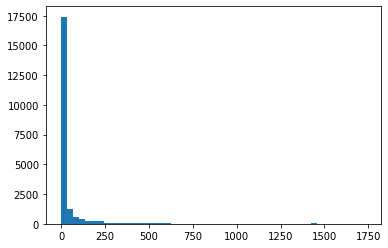

In [11]:
df['time_open'] = (df['closed_at'] - df['created_at']).dt.days
plt.hist(df['time_open'], bins=50)

# There are a few outliers if we look at the amount of time each issue is open. 
# We will cut out issues with time_open > 1000

df.drop(df.loc[df['time_open']>1000].index, inplace=True)

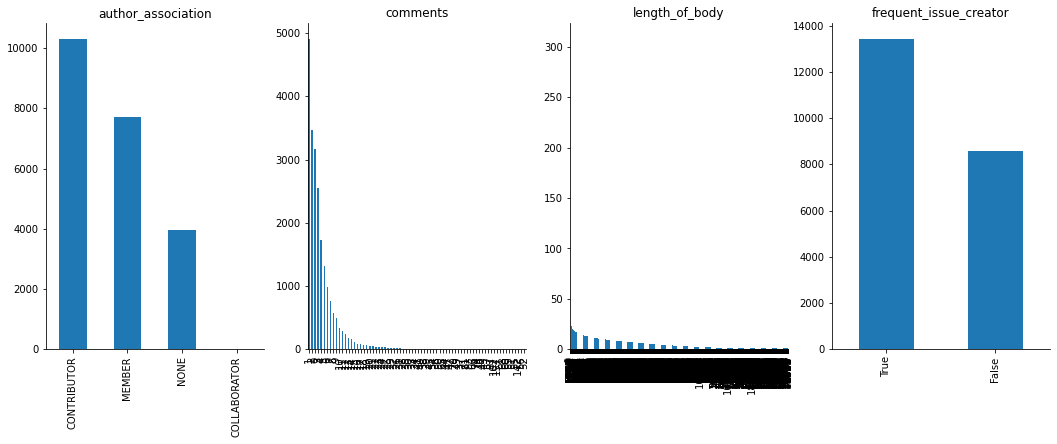

In [48]:
#plot other features we want to look for outliers in
#this is something I would like to have spent more time on

rcParams['figure.figsize'] = (18, 6)

categorical_features = ["author_association", "comments", "length_of_body", "frequent_issue_creator"]
fig, ax = plt.subplots(1, len(categorical_features))
for i, categorical_feature in enumerate(df[categorical_features]):
    df[categorical_feature].value_counts().plot(kind="bar", ax=ax[i]).set_title(categorical_feature)

In [18]:
#change all boolean variables to binary so that everything is in numerics - 0 for false, 1 for true

df['state_bin'] = [
    1 if typ == 'closed' else 0 for typ in df['state']
]

df['frequent_issue_creator_bin'] = [
    1 if typ == 'True' else 0 for typ in df['frequent_issue_creator']
]

df['has_pull_request_bin'] = [
    1 if typ == 'True' else 0 for typ in df['has_pull_request']
]

df['has_comment_bin'] = [
    1 if typ == 'True' else 0 for typ in df['has_comment']
]

df['has_assignee_bin'] = [
    1 if typ == 'True' else 0 for typ in df['has_assignee']
]

df['has_pull_request_bin'] = [
    1 if typ == 'True' else 0 for typ in df['has_pull_request']
]

df['author_num'] = [
    1 if typ == 'MEMBER' else 2 if typ == 'CONTRIBUTOR' else 0 for typ in df['author_association']
]

df

,title,state,comments,created_at,closed_at,author_association,body,has_pull_request,has_comment,has_assignee,...,label_okay_to_merge,label_provider_Google,frequent_issue_creator,time_open,state_bin,frequent_issue_creator_bin,has_pull_request_bin,has_comment_bin,has_assignee_bin,author_num
0,Remove special serde logic for mapped op_kwargs,open,0,2022-05-23 01:35:03+00:00,NaN,MEMBER,This was done in `PythonOperator` to simplify ...,True,False,False,...,False,False,True,NaN,0,0,0,0,0,1
1,update K8S-KIND to 0.14.0,open,1,2022-05-22 22:34:30+00:00,NaN,CONTRIBUTOR,https://github.com/kubernetes-sigs/kind/releas...,True,True,False,...,False,False,True,NaN,0,0,0,0,0,2
2,Main constraints for Airflow downgrade cncf.ku...,open,0,2022-05-22 20:24:44+00:00,NaN,MEMBER,### Apache Airflow version\n\nmain (developmen...,True,False,True,...,False,False,True,NaN,0,0,0,0,0,1
3,Create `get_partition` and `create_partition` ...,open,0,2022-05-22 18:39:33+00:00,NaN,CONTRIBUTOR,Add partition related methods into GlueCatalo...,True,False,False,...,False,False,False,NaN,0,0,0,0,0,2
4,Fix Databricks Operator tests,closed,0,2022-05-22 17:51:34+00:00,2022-05-22 19:00:37+00:00,CONTRIBUTOR,"I think there is a leftover of old code here, ...",True,False,False,...,False,False,True,0.0,1,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22219,Misc spelling updates,closed,3,2015-06-05 17:50:46+00:00,2015-06-07 07:55:22+00:00,CONTRIBUTOR,I was reading over the code to understand how ...,True,True,False,...,False,False,False,1.0,1,0,0,0,0,2
22220,setup.py download URL,closed,3,2015-06-05 15:18:52+00:00,2015-06-05 17:24:57+00:00,CONTRIBUTOR,While installing I noticed the `url` and `down...,True,True,False,...,False,False,False,0.0,1,0,0,0,0,2
22221,Can't add external executors -> Plugin manager,closed,17,2015-06-05 14:28:38+00:00,2015-06-17 15:41:31+00:00,NONE,Would be nice to be able to add other executor...,True,True,False,...,False,False,False,12.0,1,0,0,0,0,0
22222,Bring in more resolution to hivestats,closed,0,2015-04-20 21:54:45+00:00,2015-04-20 22:58:48+00:00,MEMBER,NaN,True,False,False,...,False,False,True,0.0,1,0,0,0,0,1


# Predictive Machine Learning

In [19]:
'''
Now that we understand our data better, let's see if we can predict 
whether or not an issue is closed given other attributes.
Should we treat all issues created over the years the same?

We notice that the classes are not balanced. Probably a good idea to address that.
'''
print(df.state_bin.value_counts())

# We will cut down the number of closed cases to 2000 so that the open and closed cases are more balanced

df_open = df.loc[df['state_bin'] == 0]
df_short = df.loc[df['state_bin'] == 1]
df_short = df_short.sample(n=2000)

df2 = pd.concat([df_open, df_short])
df2
print(df2.state_bin.value_counts())

1    21087
0      932
Name: state_bin, dtype: int64
1    2000
0     932
Name: state_bin, dtype: int64


In [20]:
'''
Which of the features above should we include in our ML model?

The title and body are great text features which we could do some NLP on, but maybe later.
'''

#We will start by including all features which we have binarized

def split_features_and_target(df2, features_ml=None):
    target = df2.state_bin
    df2.drop([c for c in df if c not in features_ml], axis=1, inplace=True)
    return df2, target


features_ml, target = split_features_and_target(
    df2,
    features_ml = [
    'state_bin',
    'frequent_issue_creator_bin',
    'author_num', 
    'length_of_title', 
    'length_of_body',
    'has_assignee_bin', 
    'has_pull_request_bin', 
    'has_comment_bin',
    'comments',
    'n_labels'
    ]
)

features_ml

,comments,length_of_title,length_of_body,n_labels,state_bin,frequent_issue_creator_bin,has_pull_request_bin,has_comment_bin,has_assignee_bin,author_num
0,0,47,606,1,0,0,0,0,0,1
1,1,25,60,2,0,0,0,0,0,2
2,0,73,853,2,0,0,0,0,0,1
3,0,75,1301,2,0,0,0,0,0,2
7,9,44,11322,1,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...
10292,3,64,1203,0,1,0,0,0,0,1
11959,6,30,339,4,1,0,0,0,0,0
21276,0,66,0,0,1,0,0,0,0,1
12616,0,31,1237,0,1,0,0,0,0,1


In [21]:
# Split the data for training and testing
# We will use a training set which is 80% of our data and a test set which is 20% of our data to validate our model

X = df2.drop('state_bin', axis=1) #Keeping all data except for the binary state column (i.e. our features)
y = df2['state_bin'] #Only keeping our data from the state column (open = 0, closed = 1)

#This package auto splits our data with 0.2 being the test size (20%) with a random seed of 42 (arbitrary randomization)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, random_state=42
)

In [22]:
# Scale data to between 0 and 1 to save memory

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled)

[[ 0.12456559 -1.12860385  0.29321028 ...  0.          0.
  -1.44031588]
 [-0.35719303 -0.74465878 -0.01569312 ...  0.          0.
  -0.20085139]
 [-0.67836545  0.66313981 -0.07514872 ...  0.          0.
  -0.20085139]
 ...
 [ 0.2851518   0.3218553  -0.48004467 ...  0.          0.
   1.0386131 ]
 [ 0.12456559  0.23653418  0.56458025 ...  0.          0.
  -1.44031588]
 [-0.67836545  0.02323136 -0.03130436 ...  0.          0.
  -1.44031588]]


In [23]:
# Load in a model and train it
# We will use a Tensorflow binary classification model

tf.random.set_seed(42) #Randomize data

#For these binary classification models we only use dense layers, here we build up the model piece by piece
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

#Compile the model
model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(lr=0.03),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

#Fit the model with the training (X) and target (y) set. 
#Epochs are the numbers of cycles the model trains for. We want to minimize loss (and thus maximize accurcay) which can be done by tuning hyperparameters/upping train time
history = model.fit(X_train_scaled, y_train, epochs=100)

2022-05-23 09:11:36.970875: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/opt/miniconda3/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
74/74 [==============================] - 1s 1ms/step - loss: 0.6680 - accuracy: 0.7113 - precision: 0.7289 - recall: 0.9167
Epoch 2/100
74/74 [==============================] - 0s 1ms/step - loss: 0.5248 - accuracy: 0.7151 - precision: 0.7259 - recall: 0.9342
Epoch 3/100
74/74 [==============================] - 0s 1ms/step - loss: 0.5157 - accuracy: 0.7433 - precision: 0.7666 - recall: 0.8954
Epoch 4/100
74/74 [==============================] - 0s 1ms/step - loss: 0.5003 - accuracy: 0.7544 - precision: 0.7769 - recall: 0.8966
Epoch 5/100
74/74 [==============================] - 0s 1ms/step - loss: 0.4960 - accuracy: 0.7599 - precision: 0.7946 - recall: 0.8728
Epoch 6/100
74/74 [==============================] - 0s 1ms/step - loss: 0.4942 - accuracy: 0.7539 - precision: 0.7854 - recall: 0.8784
Epoch 7/100
74/74 [==============================] - 0s 1ms/step - loss: 0.5073 - accuracy: 0.7518 - precision: 0.7852 - recall: 0.8747
Epoch 8/100
74/74 [=============================

74/74 [==============================] - 0s 1ms/step - loss: 0.4474 - accuracy: 0.7859 - precision: 0.8180 - recall: 0.8816
Epoch 61/100
74/74 [==============================] - 0s 1ms/step - loss: 0.4497 - accuracy: 0.7898 - precision: 0.8265 - recall: 0.8747
Epoch 62/100
74/74 [==============================] - 0s 1ms/step - loss: 0.4500 - accuracy: 0.7834 - precision: 0.8309 - recall: 0.8559
Epoch 63/100
74/74 [==============================] - 0s 1ms/step - loss: 0.4472 - accuracy: 0.7812 - precision: 0.8082 - recall: 0.8897
Epoch 64/100
74/74 [==============================] - 0s 1ms/step - loss: 0.4623 - accuracy: 0.7855 - precision: 0.8247 - recall: 0.8697
Epoch 65/100
74/74 [==============================] - 0s 1ms/step - loss: 0.4522 - accuracy: 0.7876 - precision: 0.8272 - recall: 0.8697
Epoch 66/100
74/74 [==============================] - 0s 1ms/step - loss: 0.4467 - accuracy: 0.7885 - precision: 0.8209 - recall: 0.8816
Epoch 67/100
74/74 [==============================] - 

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1280      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 100,353
Trainable params: 100,353
Non-trainable params: 0
_________________________________________________________________


In [25]:
# Evaluate the model on the test data
# Now we are using our test data to make predictions
predictions = model.predict(X_test_scaled)

#Convery the predictions (which are probabilities) into binary classes
#The model spits out the probability of being closed or not, so if >50% we will say it's good

prediction_classes = [
    1 if prob > 0.5 else 0 for prob in np.ravel(predictions)
]

In [26]:
#### Confusion Matrix to evalute binary classification ####

#(0,0) True Negative
#(1,0) False Negative
#(0,1) False Positive
#(1,1) True Positive

print(confusion_matrix(y_test, prediction_classes))

[[ 97  86]
 [ 51 353]]


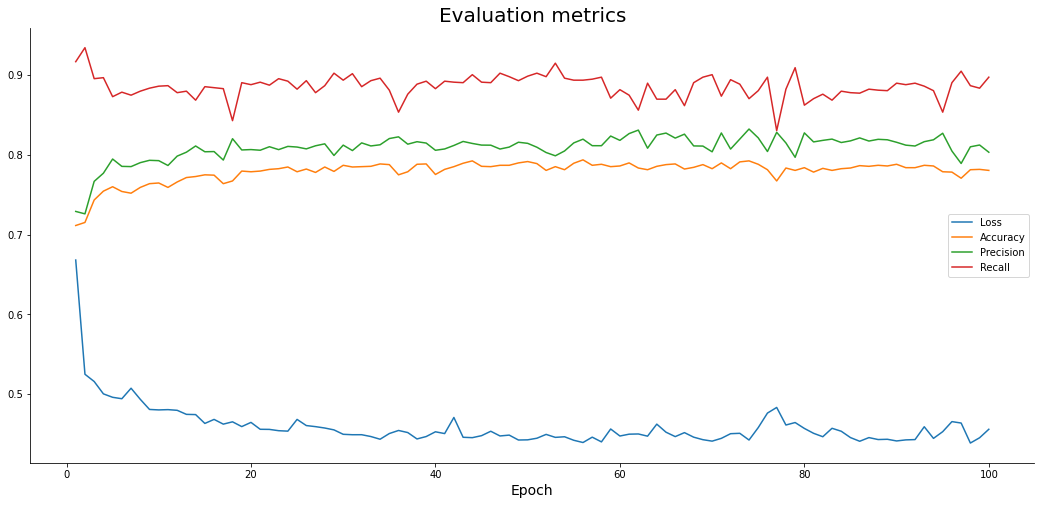

In [27]:
# Plot the output parameters' evolution with epoch
# Setting up plot style
rcParams['figure.figsize'] = (18, 8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

#Show loss
plt.plot(
    np.arange(1, 101), 
    history.history['loss'], label='Loss'
)

#Show accuracy
plt.plot(
    np.arange(1, 101), 
    history.history['accuracy'], label='Accuracy'
)

#Show precision
plt.plot(
    np.arange(1, 101), 
    history.history['precision'], label='Precision'
)

#Show recall/TPR (TP/(TP+FN))
plt.plot(
    np.arange(1, 101), 
    history.history['recall'], label='Recall'
)
plt.title('Evaluation metrics', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();

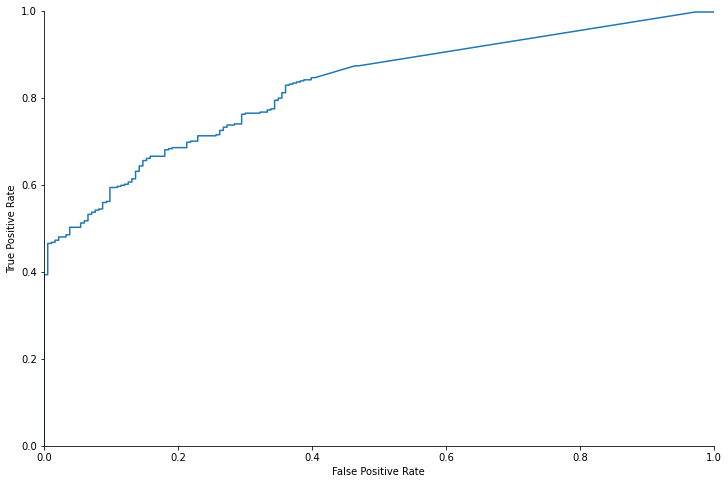

0.8242100849429204


In [43]:
# Plot the receiver operating characteristic curve and include the area under the curve
fpr , tpr , thresholds = roc_curve (y_test , predictions)

rcParams['figure.figsize'] = (12 , 8)
def plot_roc_curve(fpr,tpr): 
  plt.plot(fpr,tpr) 
  plt.axis([0,1,0,1]) 
  plt.xlabel('False Positive Rate') 
  plt.ylabel('True Positive Rate') 
  plt.show()    
  
plot_roc_curve (fpr,tpr) 
auc_score=roc_auc_score(y_test,predictions)
print(auc_score)

## Extra - NLP on Comments

In [ ]:
# This is something that could be done in pre-processing in order to quantify comments as 'good' or 'bad' using a recurrent neural net

df2 = df2.fillna('none')
feature_voc = df2['body'] #Get our comment data

In [ ]:
#Here we tokenize the data (i.e. define a word index and assign each word a value) as well as get the length of the full vocab used for our selected entries

token = Tokenizer()
token.fit_on_texts(feature_voc)
word_index=token.word_index
vocab_size = len(token.word_counts) + 1
print(vocab_size)
print(word_index)

In [ ]:
#Define a function to encode our text using our newly defined word index

def encode_text(text):
  tokens = keras.preprocessing.text.text_to_word_sequence(text)
  tokens = [word_index[word] if word in word_index else 0 for word in tokens]
  return sequence.pad_sequences([tokens], 250)[0]

In [ ]:
f_datalist=[]
for i in range(len(feature)):
  temp_list=feature[i][0].tolist()
  f_datalist.append(temp_list)

l_datalist=[]
for i in range(len(label)):
  temp_list=label[i][0].tolist()
  l_datalist.append(temp_list)
print(l_datalist)

#Go through and run this encoding function on all the entries in the comments column (probably could do this in the pandas df and it would work)

for i in range(len(feature)):
  feature[i][0]=encode_text(feature[i][0])

sequences = pad_sequences(f_datalist, maxlen=250, padding='pre')

In [ ]:
##Split into training/testing 80/20 and randomize it

feature_train, feature_test, label_train, label_test = train_test_split(
    sequences, l_datalist, 
    test_size=0.2, random_state=42
)

In [ ]:
## Build model using standard embedding layer to deal with our encoded comments, then a Long Short Term Memory Reuccurent NN to train, mapping it all to a dense layer that will predict the sentiment which in our case will be is this a "closed worthy" comment or "open worthy"
#By this we mean a good or a bad comment, and we can then use this binarized data as a feature input in our DNN. We can add complexity to this by including sampling based on the length of comments, as well as other correlated values

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 32),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

#model.summary()
model.compile(loss="binary_crossentropy",optimizer="rmsprop",metrics=['acc'])

history = model.fit(feature_train, label_train, epochs=10, validation_split=0.2)

In [ ]:
results = model.evaluate(feature_test, label_test)
print(results)

In [ ]:
# Now we can use this to predict good or bad comment quality from our RNN
# We could add this in to pre-processing adn use as another feature in our binary classification
# This could also be done on the issue titles

def predict(text):
  encoded_text = encode_text(text)
  pred = np.zeros((1,250))
  pred[0] = encoded_text
  result = model.predict(pred) 
  print(result[0])